In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, MobileNetV2, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model



In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow.keras.backend as K
import cv2

train_dir = r'C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\train'
val_dir = r'C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\val'
test_dir = r'C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\test'

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # important for predictions
)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


Classes: ['fire', 'nofire']


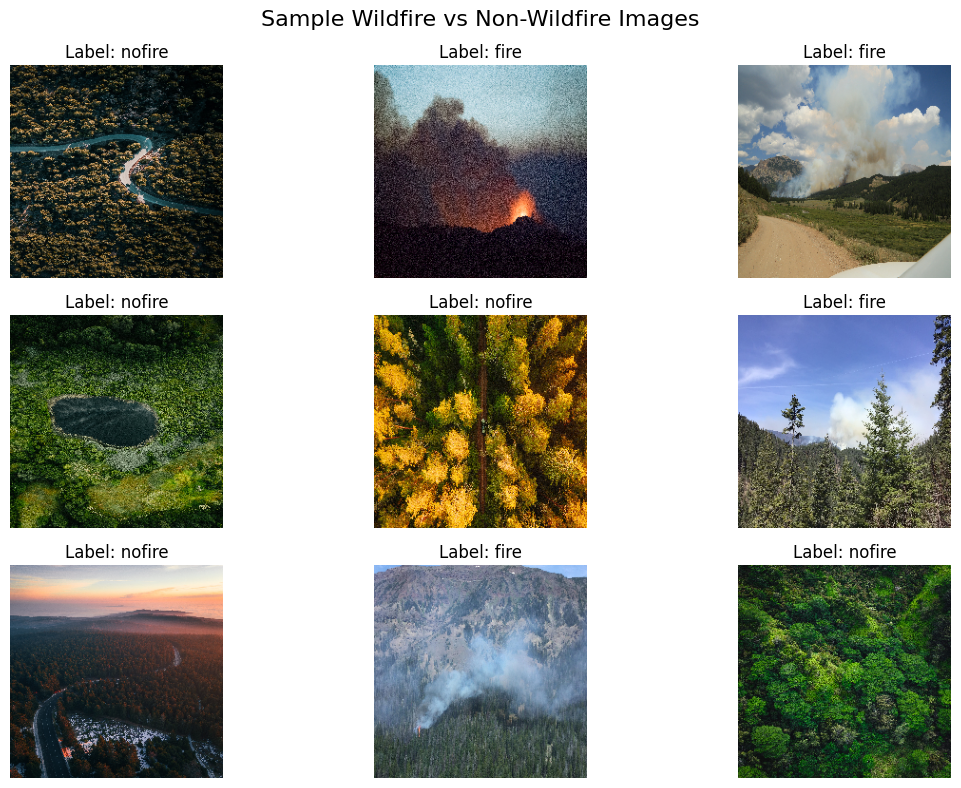

In [29]:
# Get class indices
class_names = list(train_data.class_indices.keys())
print("Classes:", class_names)

# Visualize first batch
images, labels = next(train_data)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {class_names[int(labels[i])]}")
    plt.axis("off")
plt.suptitle("Sample Wildfire vs Non-Wildfire Images", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import os


train_dir = r"C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\train"
val_dir   = r"C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\val"
test_dir  = r"C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\test"


img_height, img_width = 224, 224
batch_size = 32


datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # test tahmin sıraları sabit olsun
)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Katmanları dondur (fine-tuning yapmadım)
base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model eğitimi
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=[early_stop]
)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.
Epoch 1/20
22/59 [==========>...................] - ETA: 2:56 - loss: 0.5481 - accuracy: 0.6984

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


55/59 [==========================>...] - ETA: 20s - loss: 0.4678 - accuracy: 0.7681 

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


59/59 [==============================] - 373s 6s/step - loss: 0.4659 - accuracy: 0.7700 - val_loss: 0.4124 - val_accuracy: 0.8109
Epoch 2/20
59/59 [==============================] - 365s 6s/step - loss: 0.3544 - accuracy: 0.8506 - val_loss: 0.3759 - val_accuracy: 0.8333
Epoch 3/20
59/59 [==============================] - 357s 6s/step - loss: 0.3227 - accuracy: 0.8649 - val_loss: 0.3483 - val_accuracy: 0.8632
Epoch 4/20
59/59 [==============================] - 345s 6s/step - loss: 0.3024 - accuracy: 0.8723 - val_loss: 0.3419 - val_accuracy: 0.8632
Epoch 5/20
59/59 [==============================] - 351s 6s/step - loss: 0.2914 - accuracy: 0.8718 - val_loss: 0.3380 - val_accuracy: 0.8607
Epoch 6/20
59/59 [==============================] - 352s 6s/step - loss: 0.2771 - accuracy: 0.8839 - val_loss: 0.3194 - val_accuracy: 0.8657
Epoch 7/20
59/59 [==============================] - 355s 6s/step - loss: 0.2641 - accuracy: 0.8877 - val_loss: 0.3184 - val_accuracy: 0.8657
Epoch 8/20
59/59 [======

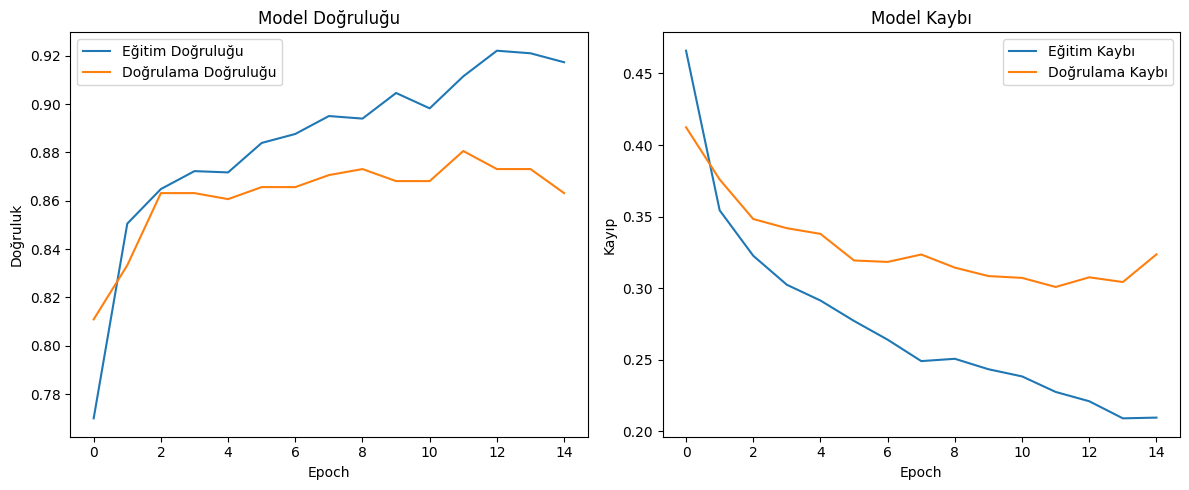

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()


13/13 [==============================] - 69s 5s/step


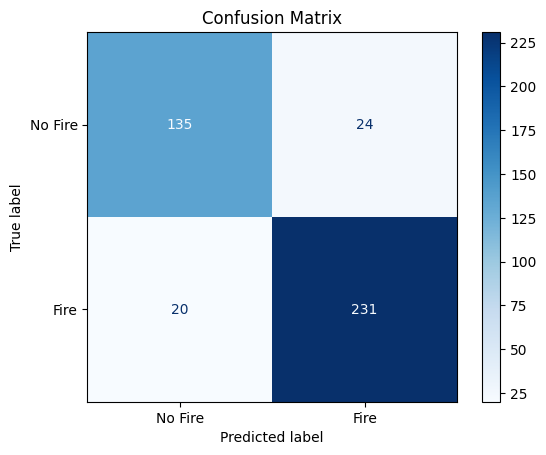


Classification Report:

              precision    recall  f1-score   support

     No Fire       0.87      0.85      0.86       159
        Fire       0.91      0.92      0.91       251

    accuracy                           0.89       410
   macro avg       0.89      0.88      0.89       410
weighted avg       0.89      0.89      0.89       410



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


y_pred_prob = model.predict(test_data)
y_pred_classes = (y_pred_prob > 0.5).astype("int32").flatten()

y_true = test_data.classes 

# Confusion Matrix çizimi
cm = confusion_matrix(y_true, y_pred_classes, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=["No Fire", "Fire"]))


In [18]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

img_height = 224
img_width = 224


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# EfficientNetB0 modeli 
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_initial = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    callbacks=[early_stop]
)

base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Eğitim
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop]
)


Epoch 1/5
59/59 [==============================] - 414s 7s/step - loss: 0.6723 - accuracy: 0.6105 - val_loss: 0.6677 - val_accuracy: 0.6119
Epoch 2/5
59/59 [==============================] - 454s 8s/step - loss: 0.6710 - accuracy: 0.6116 - val_loss: 0.6680 - val_accuracy: 0.6119
Epoch 3/5
59/59 [==============================] - 410s 7s/step - loss: 0.6743 - accuracy: 0.6105 - val_loss: 0.6706 - val_accuracy: 0.6119
Epoch 4/5
59/59 [==============================] - 390s 7s/step - loss: 0.6736 - accuracy: 0.6116 - val_loss: 0.6683 - val_accuracy: 0.6119
Epoch 1/15
59/59 [==============================] - 407s 7s/step - loss: 0.6825 - accuracy: 0.5734 - val_loss: 0.6701 - val_accuracy: 0.6119
Epoch 2/15
59/59 [==============================] - 454s 8s/step - loss: 0.6711 - accuracy: 0.6105 - val_loss: 0.6728 - val_accuracy: 0.6119
Epoch 3/15
59/59 [==============================] - 404s 7s/step - loss: 0.6711 - accuracy: 0.6137 - val_loss: 0.6735 - val_accuracy: 0.6119
Epoch 4/15
59/59 

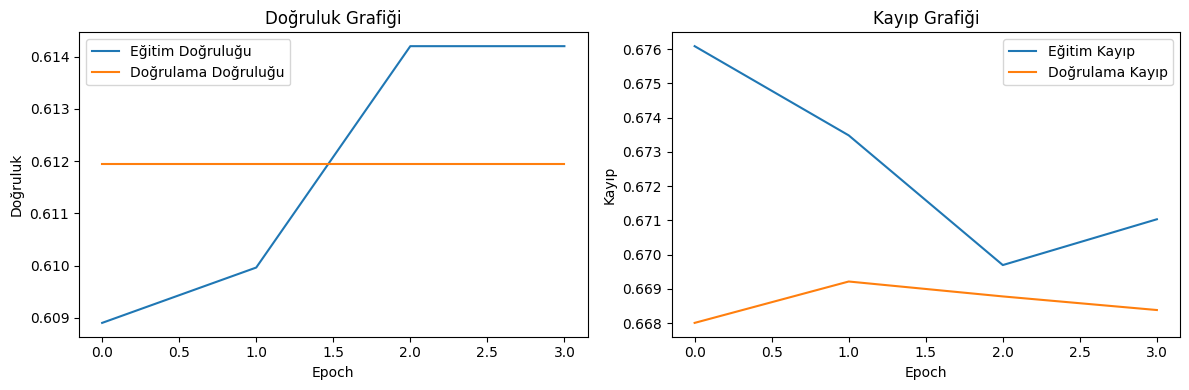

In [19]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Loss grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kayıp')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıp')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, concatenate, Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


def fire_module(x, squeeze_filters, expand_filters):
    squeeze = Conv2D(squeeze_filters, (1, 1), activation='relu', padding='same')(x)
    expand1x1 = Conv2D(expand_filters, (1, 1), activation='relu', padding='same')(squeeze)
    expand3x3 = Conv2D(expand_filters, (3, 3), activation='relu', padding='same')(squeeze)
    return concatenate([expand1x1, expand3x3])


def build_firenet(input_shape=(224, 224, 3)):
    input_img = Input(shape=input_shape)
    x = Conv2D(96, (7,7), strides=(2,2), activation='relu', padding='same')(input_img)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    x = fire_module(x, 16, 64)
    x = fire_module(x, 16, 64)
    x = fire_module(x, 32, 128)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    x = fire_module(x, 32, 128)
    x = fire_module(x, 48, 192)
    x = fire_module(x, 48, 192)
    x = fire_module(x, 64, 256)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    x = fire_module(x, 64, 256)
    x = Dropout(0.5)(x)
    x = Conv2D(1, (1,1), activation='sigmoid')(x)
    x = Flatten()(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_img, outputs=output)
    return model

image_size = (224, 224)
batch_size = 32

train_dir = r"C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\train"
val_dir = r"C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\val"
test_dir = r"C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\test"

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode='binary')
val_data = val_gen.flow_from_directory(val_dir, target_size=image_size, batch_size=batch_size, class_mode='binary')
test_data = test_gen.flow_from_directory(test_dir, target_size=image_size, batch_size=batch_size, class_mode='binary', shuffle=False)


model = build_firenet(input_shape=(224, 224, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_firenet = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=[early_stop]
)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.
Epoch 1/20
 2/59 [>.............................] - ETA: 5:02 - loss: 0.6827 - accuracy: 0.6250

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


44/59 [=====================>........] - ETA: 1:30 - loss: 0.6713 - accuracy: 0.6112

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


59/59 [==============================] - 432s 7s/step - loss: 0.6709 - accuracy: 0.6121 - val_loss: 0.6685 - val_accuracy: 0.6119
Epoch 2/20
59/59 [==============================] - 425s 7s/step - loss: 0.6695 - accuracy: 0.6131 - val_loss: 0.6681 - val_accuracy: 0.6119
Epoch 3/20
59/59 [==============================] - 486s 8s/step - loss: 0.6689 - accuracy: 0.6131 - val_loss: 0.6695 - val_accuracy: 0.6119
Epoch 4/20
59/59 [==============================] - 440s 7s/step - loss: 0.6695 - accuracy: 0.6131 - val_loss: 0.6698 - val_accuracy: 0.6119
Epoch 5/20
59/59 [==============================] - 428s 7s/step - loss: 0.6691 - accuracy: 0.6131 - val_loss: 0.6683 - val_accuracy: 0.6119


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


train_path = r"C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\train"
val_path = r"C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\val"


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# VGG19 modeli
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history_vgg = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=[early_stop]
)



Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
80134624/80134624 [==============================] - 22s 0us/step
Epoch 1/20
59/59 [==============================] - 675s 11s/step - loss: 0.6505 - accuracy: 0.6142 - val_loss: 0.5818 - val_accuracy: 0.6990
Epoch 2/20
59/59 [==============================] - 709s 12s/step - loss: 0.5870 - accuracy: 0.6714 - val_loss: 0.5564 - val_accuracy: 0.7040
Epoch 3/20
59/59 [==============================] - 762s 13s/step - loss: 0.5524 - accuracy: 0.7138 - val_loss: 0.5541 - val_accuracy: 0.6915
Epoch 4/20
59/59 [==============================] - 637s 11s/step - loss: 0.5343 - accuracy: 0.7313 - val_loss: 0.5166 - val_accuracy: 0.7214
Epoch 5/20
59/59 [==============================] - 626s 11s/step - loss: 0.5035 - accuracy: 0.7552 - val_loss: 0.5224 - val_accuracy: 0.7313
Epoch 6/20
59/59 [==============================] - 630s 11s/step - loss: 0.4991 - accuracy: 0.7599 - val_loss: 0.4904 - val_accuracy: 0.7662

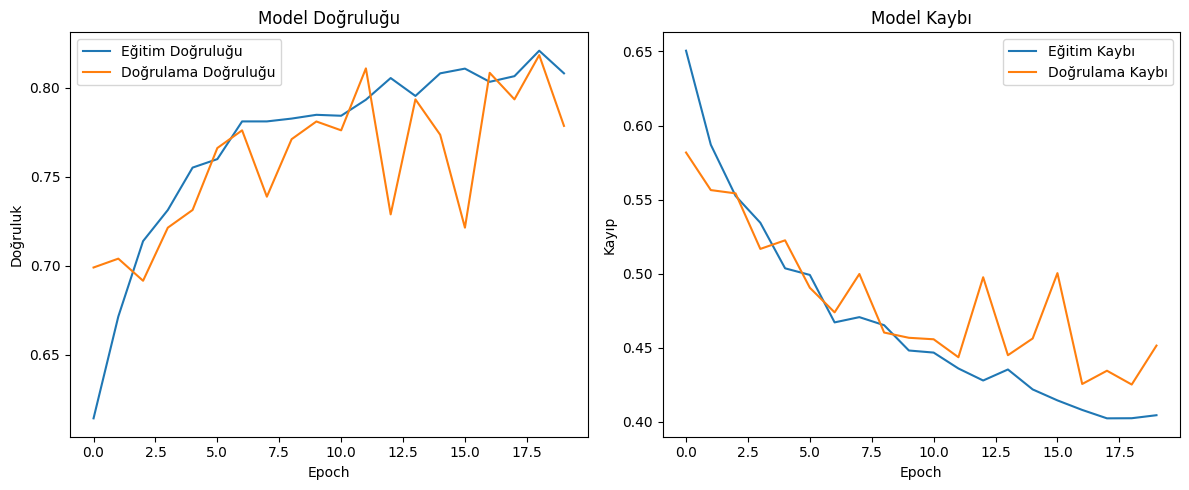

13/13 [==============================] - 106s 8s/step


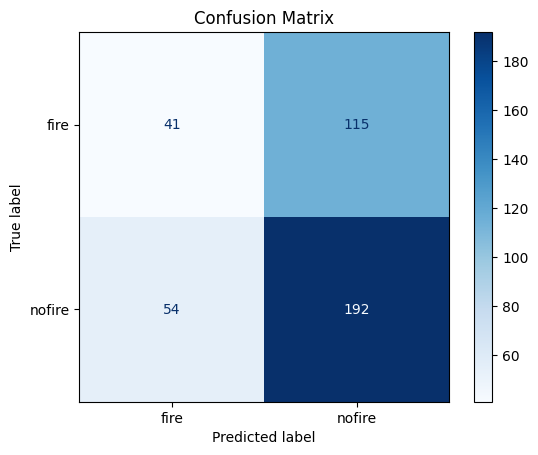

Sınıflandırma Raporu:

              precision    recall  f1-score   support

        fire       0.43      0.26      0.33       156
      nofire       0.63      0.78      0.69       246

    accuracy                           0.58       402
   macro avg       0.53      0.52      0.51       402
weighted avg       0.55      0.58      0.55       402



In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

plt.figure(figsize=(12, 5))

# Doğruluk
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_vgg.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Eğitim Kaybı')
plt.plot(history_vgg.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

# Tahminler ve gerçekler
val_data.reset()
predictions = model.predict(val_data, verbose=1)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = val_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(val_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Sınıflandırma Raporu
print("Sınıflandırma Raporu:\n")
print(classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))


In [2]:
pip install tensorflow-hub


  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 294.2 kB/s eta 0:00:05
   ------------ --------------------------- 0.5/1.7 MB 294.2 kB/s eta 0:00:05
   ------------ --------------------------- 0.5/1.7 MB 294.2 kB/s eta 0:00:05
   ------------------ --------------------- 0.8/1.7 MB 328.9 kB/s eta 0:00:03
   ------------------ --------------------- 0.8/1.7 MB 328.9 kB/s eta 0:00:03
   ------------------ --------------------- 0.8

  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, models
from sklearn.model_selection import train_test_split

In [12]:
class FireDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.label_map = {"fire": 1, "no fire": 0}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = row['image_path']
        label = self.label_map[row['label']]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

In [13]:
import os
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Görseller için ön işleme işlemleri
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

base_dir = r"C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version"

# Eğitim, doğrulama ve test veri kümeleri
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

train_dataset = ImageFolder(root=train_dir, transform=transform)
val_dataset = ImageFolder(root=val_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Veri yükleyiciler
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Sınıf Etiketleri:", train_dataset.classes)  # ['fire', 'nofire']


Sınıf Etiketleri: ['fire', 'nofire']


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def visualize(train_dataloader):
    images,labels=next((iter(train_dataloader)))
    images,labels=images.to(torch.device("cpu")),labels.to(torch.device("cpu"))
    label_names = {0: "no fire", 1: "fire"}
    fig,axes=plt.subplots(1,5,figsize=(20,3))
    for i in range(5):
        im=images[i].cpu().numpy().transpose((1,2,0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        im = std * im + mean  # Denormalize
        im = np.clip(im, 0, 1)
        #im=im*0.5+0.5
        axes[i].set_title(f"Label: {label_names[labels[i].item()]}")
        axes[i].imshow(im)
    plt.tight_layout()
    plt.show()

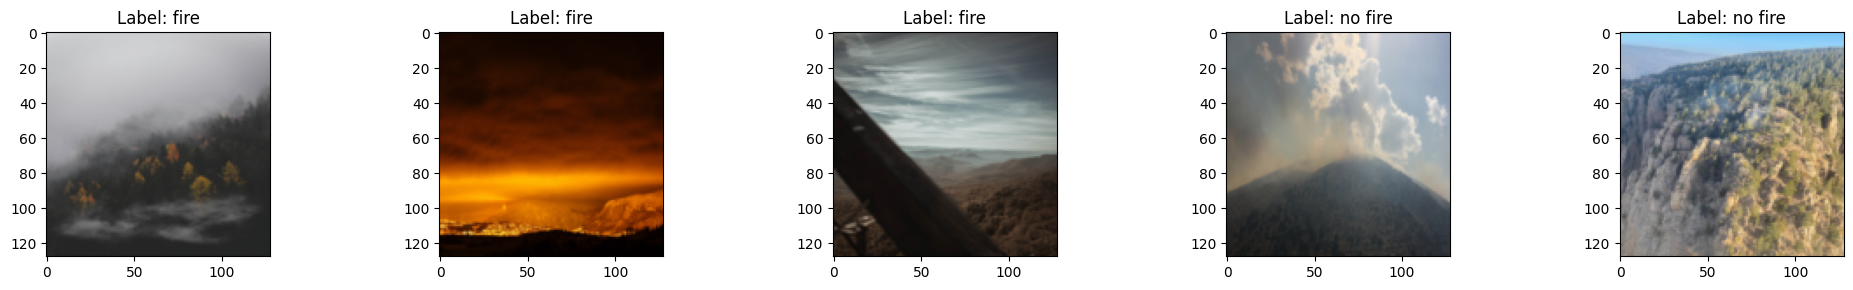

In [15]:
visualize(train_loader)

In [16]:
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/216.1 MB 1.8 MB/s eta 0:01:59
   ---------------------------------------- 0.8/216.1 MB 1.6 MB/s eta 0:02:14
   ---------------------------------------- 1.3/216.1 MB 1.6 MB/s eta 0:02:13
   ---------------------------------------- 1.6/216.1 MB 1.6 MB/s eta 0:02:17
   ---------------------------------------- 1.8/216.1 MB 1.6 MB/s eta 0:02:18
   ------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'efficientnet_pytorch'

In [18]:
pip install efficientnet_pytorch


  Using cached efficientnet_pytorch-0.7.1.tar.gz (21 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16482 sha256=1b58a99a372958b7432bfc76007f5fb63ba2ba2df17d8a39c4bc21b9691de603
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\03\3f\e9\911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'efficientnet_pytorch' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'efficientnet_pytorch'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [19]:
from efficientnet_pytorch import EfficientNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model =  EfficientNet.from_pretrained('efficientnet-b0', num_classes=2)# 2 classes: fire, no fire
model = model.to(device)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\efficientnet-b0-355c32eb.pth
100%|█████████████████████████████████████████████████████████████████████████████| 20.4M/20.4M [00:20<00:00, 1.03MB/s]

Loaded pretrained weights for efficientnet-b0


In [20]:
print(torch.cuda.is_available())

False


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
from torch.cuda.amp import autocast, GradScaler

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5, patience=3):
    scaler = GradScaler()
    best_val_acc = 0.0
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            with autocast():  # Mixed precision
                outputs = model(images)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        
        train_acc = correct / total
        print(f"Epoch {epoch+1}: Train Loss = {total_loss:.4f}, Train Acc = {train_acc:.4f}")

        # Validation
        model.eval()
        val_correct, val_total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_acc = val_correct / val_total
        print(f"           Val Acc = {val_acc:.4f}")

        # Early stopping logic
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
            print("✅ Best model saved!")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("⏹️ Early stopping triggered.")
                break

In [23]:
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=25, patience=5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\3394424871.py:4: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\3394424871.py:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Mixed precision
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (8974

Epoch 1: Train Loss = 21.6588, Train Acc = 0.8484
           Val Acc = 0.8856
✅ Best model saved!
Epoch 2: Train Loss = 8.8371, Train Acc = 0.9481
           Val Acc = 0.8682
Epoch 3: Train Loss = 5.8654, Train Acc = 0.9693
           Val Acc = 0.8333
Epoch 4: Train Loss = 4.7121, Train Acc = 0.9698
           Val Acc = 0.9055
✅ Best model saved!
Epoch 5: Train Loss = 3.2906, Train Acc = 0.9836
           Val Acc = 0.8955
Epoch 6: Train Loss = 5.3946, Train Acc = 0.9624
           Val Acc = 0.8632
Epoch 7: Train Loss = 3.4708, Train Acc = 0.9799
           Val Acc = 0.9080
✅ Best model saved!
Epoch 8: Train Loss = 1.6528, Train Acc = 0.9921
           Val Acc = 0.9030
Epoch 9: Train Loss = 1.3866, Train Acc = 0.9958
           Val Acc = 0.9104
✅ Best model saved!
Epoch 10: Train Loss = 1.3945, Train Acc = 0.9899
           Val Acc = 0.9030
Epoch 11: Train Loss = 3.0273, Train Acc = 0.9830
           Val Acc = 0.8905
Epoch 12: Train Loss = 2.4478, Train Acc = 0.9841
           Val Acc =

In [3]:
pip install timm


   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.5 MB 3.0 MB/s eta 0:00:01
   ------------------------- -------------- 1.6/2.5 MB 3.0 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.5 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/558.8 kB ? eta -:--:--
   ------------------------------------- -- 524.3/558.8 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 558.8/558.8 kB 2.4 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_h

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [1]:
import os
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_dir = r"C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version"

# Transformasyonlar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])


train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ViT modeli (timm kullanarak)
model = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=2)
model.to(device)

# Kayıp fonksiyonu ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Eğitim döngüsü
train_losses, val_losses = [], []

for epoch in range(5):
    model.train()
    total_train_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Error while downloading from https://cdn-lfs.hf.co/repos/fb/cd/fbcdc88e492959e3ee2515f497fb45cb5f217f9455c204bdf4e0b400c90d0c23/32aa17d6e17b43500f531d5f6dc9bc93e56ed8841b8a75682e1bb295d722405b?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1754482620&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc1NDQ4MjYyMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9mYi9jZC9mYmNkYzg4ZTQ5Mjk1OWUzZWUyNTE1ZjQ5N2ZiNDVjYjVmMjE3Zjk0NTVjMjA0YmRmNGUwYjQwMGM5MGQwYzIzLzMyYWExN2Q2ZTE3YjQzNTAwZjUzMWQ1ZjZkYzliYzkzZTU2ZWQ4ODQxYjhhNzU2ODJlMWJiMjk1ZDcyMjQwNWI%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qIn1dfQ__

Epoch 1: Train Loss = 0.3737, Val Loss = 0.2512
Epoch 2: Train Loss = 0.1615, Val Loss = 0.2567
Epoch 3: Train Loss = 0.0848, Val Loss = 0.2522
Epoch 4: Train Loss = 0.0552, Val Loss = 0.2498
Epoch 5: Train Loss = 0.0539, Val Loss = 0.2336


In [2]:
from sklearn.metrics import accuracy_score

model.eval()

# Tüm tahmin ve gerçek değerleri toplayacağım listeler
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Doğruluk (Accuracy) hesaplama
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Doğruluk (Accuracy): {accuracy * 100:.2f}%")


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Test Doğruluk (Accuracy): 94.39%


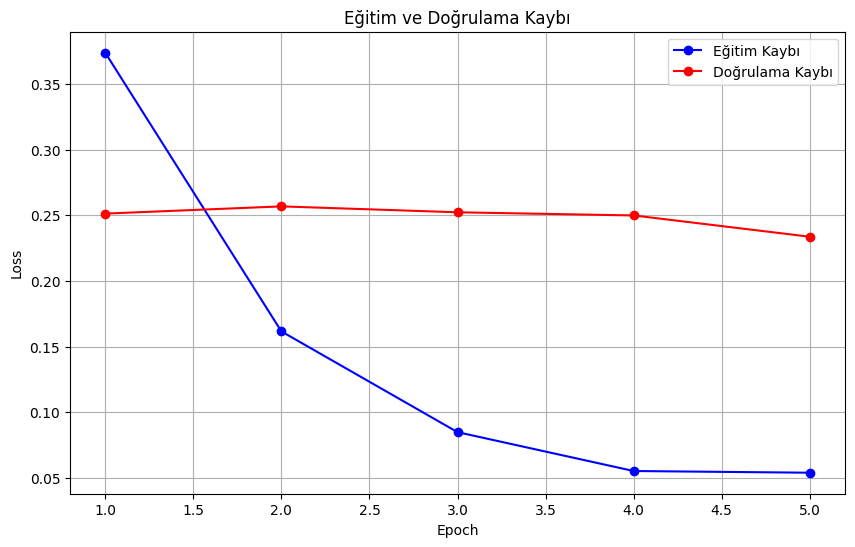

In [3]:
import matplotlib.pyplot as plt

# Epoch başına loss değerleri 
train_losses = [0.3737, 0.1615, 0.0848, 0.0552, 0.0539]
val_losses = [0.2512, 0.2567, 0.2522, 0.2498, 0.2336]

epochs = range(1, 6)

plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, 'bo-', label='Eğitim Kaybı')
plt.plot(epochs, val_losses, 'ro-', label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()
plt.grid(True)
plt.show()


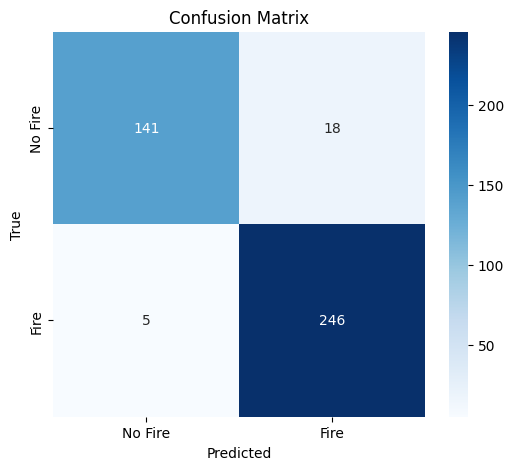

Classification Report:
              precision    recall  f1-score   support

     No Fire       0.97      0.89      0.92       159
        Fire       0.93      0.98      0.96       251

    accuracy                           0.94       410
   macro avg       0.95      0.93      0.94       410
weighted avg       0.94      0.94      0.94       410



In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=["No Fire", "Fire"]))


In [1]:
from IPython.display import HTML

HTML('''
<script>
function toggleOutput(cell) {
    var output_area = cell.querySelector('.output');
    if (output_area.style.display === 'none') {
        output_area.style.display = '';
    } else {
        output_area.style.display = 'none';
    }
}

document.querySelectorAll('.cell').forEach(function(cell) {
    let btn = document.createElement('button');
    btn.innerHTML = 'Hide/Show Output';
    btn.style.margin = '5px';
    btn.onclick = function() { toggleOutput(cell); };
    cell.insertBefore(btn, cell.firstChild);
});
</script>
''')